```
* solve:
  adot/a  = (planet tidal damping part) + (stellar tidal damping part)
          = (stellar tidal damping part)     [assuming synchronous]
          = [assume e=0]
          = - 9 * (1/Qstar) (Mp/Mstar) (Rstar/a)^5 ( n - Ωstar )
          = [assume n >> Ωstar, as is sometimes the case]
          = - 9 * n * (1/Qstar) (Mp/Mstar) (Rstar/a)^5 

- ignore omega_star
- ignore rstar evolution (it'll just get bigger, which will only speed up the
      process!)
- just do the single ODE.
- is it at least a marginally respectable idea that it could be tides?
```


We have
\begin{equation}
\frac{\dot{a}}{a} = - \frac{9 n}{Q_\star} \cdot \frac{M_p}{M_\star} \cdot
\left( \frac{R_\star}{a}\right)^5
\end{equation}

so
\begin{equation}
\dot{a} = - 18 \pi \frac{a}{P} \frac{1}{Q_\star} \cdot \frac{M_p}{M_\star} \cdot
\left( \frac{R_\star}{a}\right)^5
\end{equation}

and if we analytically integrate this from the initial sma to the stellar surface, we find
\begin{equation}
t_{\mathrm{final}} - t_{\mathrm{initial}} =
(a_{\mathrm{initial}}^{13/2} - R_\star^{13/2}) \frac{2}{13\cdot 18\pi} \cdot \frac{M_\star}{M_p} \cdot \left( \frac{GM_{\mathrm{tot}}}{4\pi^2} \right)^{1/2} \frac{Q_\star}{R_\star^5}
\end{equation}

which we can recast as

\begin{equation}
a(t) = \left( a_{\mathrm{initial}}^{13/2}  - \frac{13\cdot18\pi}{2} \cdot \frac{M_p}{M_\star} \left( \frac{GM_{\mathrm{tot}}}{4\pi^2} \right)^{1/2}   \frac{R_\star^5}{Q_\star} (t-t_0)  \right)^{2/13}
\end{equation}

In [1]:
from __future__ import division, print_function

import numpy as np
from astropy import units as u, constants as const
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

def tfinal_minus_tinitial(
    a_initial, R_star, M_star, M_planet, Q_star):
    
    delta_t = (
        (a_initial**(13/2) - R_star**(13/2)) *
        (2 / (13*18*np.pi)) *
        (M_star/M_planet) *
        ( (const.G * (M_star+M_planet))/(4*np.pi**2) )**(-1/2) *
        Q_star / (R_star**5)
    )
    
    return delta_t

def a_of_t(a_initial, M_planet, M_star, R_star, Q_star, time):
    return (
        a_initial**(13/2) - (
        13*18*np.pi/2 * M_planet/M_star *
        (const.G*(M_planet+M_star)/(4*np.pi**2))**(1/2) *
        R_star**5 / Q_star * time )
    )**(2/13)

def vector_a_of_t(a_initial, M_planet, M_star, R_star, Q_star, time):
    # given N a_initial values and M times, return NxM vector of a(t)
    
    return (
        a_initial[:,None]**(13/2) - (
        13*18*np.pi/2 * M_planet/M_star *
        (const.G*(M_planet+M_star)/(4*np.pi**2))**(1/2) *
        R_star**5 / Q_star * time[None,:] )
    )**(2/13)


In [2]:
M_planet = 1*u.Mjupiter
M_star = 1*u.Msun
Q_star = 1e6
R_star = 1*u.Rsun

a_initial = 5*R_star

with open('semimajor_axis_evoln_timescales.txt', 'w') as f:
    
    for R_star in np.arange(0.8,1.4,0.2)*u.Rsun:
        f.write('\n')
        for M_planet in np.logspace(-3,0,4)*u.Mjup:
            for Q_star in np.logspace(6,9,4):

                line = (
                    'Mp: {:.1e} = {:.1e}, Qstar: {:.1e}, Rstar: {:.1e}, tmerge: {:.1e}\n'.
                    format(
                    M_planet, M_planet.to(u.Mearth), Q_star, R_star,
                    tfinal_minus_tinitial(
                        a_initial, R_star, M_star, M_planet, Q_star
                    ).to(u.Gyr)
                    )
                )

                f.write(line)

In [3]:
! head semimajor_axis_evoln_timescales.txt


Mp: 1.0e-03 jupiterMass = 3.2e-01 earthMass, Qstar: 1.0e+06, Rstar: 8.0e-01 solRad, tmerge: 9.6e+01 Gyr
Mp: 1.0e-03 jupiterMass = 3.2e-01 earthMass, Qstar: 1.0e+07, Rstar: 8.0e-01 solRad, tmerge: 9.6e+02 Gyr
Mp: 1.0e-03 jupiterMass = 3.2e-01 earthMass, Qstar: 1.0e+08, Rstar: 8.0e-01 solRad, tmerge: 9.6e+03 Gyr
Mp: 1.0e-03 jupiterMass = 3.2e-01 earthMass, Qstar: 1.0e+09, Rstar: 8.0e-01 solRad, tmerge: 9.6e+04 Gyr
Mp: 1.0e-02 jupiterMass = 3.2e+00 earthMass, Qstar: 1.0e+06, Rstar: 8.0e-01 solRad, tmerge: 9.6e+00 Gyr
Mp: 1.0e-02 jupiterMass = 3.2e+00 earthMass, Qstar: 1.0e+07, Rstar: 8.0e-01 solRad, tmerge: 9.6e+01 Gyr
Mp: 1.0e-02 jupiterMass = 3.2e+00 earthMass, Qstar: 1.0e+08, Rstar: 8.0e-01 solRad, tmerge: 9.6e+02 Gyr
Mp: 1.0e-02 jupiterMass = 3.2e+00 earthMass, Qstar: 1.0e+09, Rstar: 8.0e-01 solRad, tmerge: 9.6e+03 Gyr
Mp: 1.0e-01 jupiterMass = 3.2e+01 earthMass, Qstar: 1.0e+06, Rstar: 8.0e-01 solRad, tmerge: 9.6e-01 Gyr


/Users/luke/local/miniconda3/envs/sci/lib/python3.6/site-packages/astropy/units/quantity.py:639: RuntimeWarning: invalid value encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


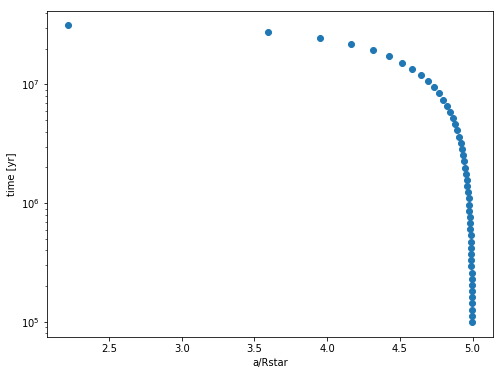

In [4]:
M_planet = 1*u.Mjupiter
M_star = 1*u.Msun
Q_star = 1e6
R_star = 1*u.Rsun

a_initial = 5*R_star

times = np.logspace(5,10.15,100)*u.yr

a = a_of_t(a_initial, M_planet, M_star, R_star, Q_star, times)
a_by_Rstar = (a/R_star).cgs.value

f,ax = plt.subplots(figsize=(8,6))

ax.scatter(a_by_Rstar, times)
ax.set_yscale('log')

ax.set_xlabel('a/Rstar')
ax.set_ylabel('time [yr]');

/Users/luke/local/miniconda3/envs/sci/lib/python3.6/site-packages/astropy/units/quantity.py:639: RuntimeWarning: invalid value encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


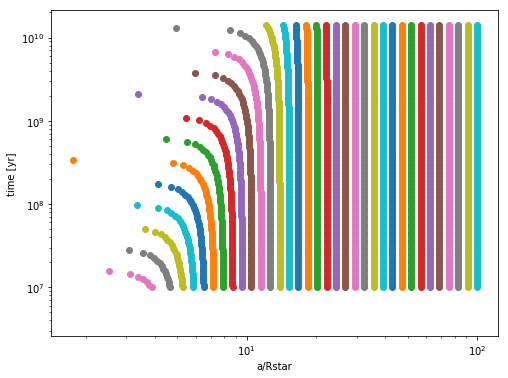

In [5]:
M_planet = 1*u.Mjupiter
M_star = 1*u.Msun
Q_star = 1e6
R_star = 1*u.Rsun

a_initials = np.logspace(0,2,50)*R_star

times = np.logspace(7,10.15,100)*u.yr

a = vector_a_of_t(a_initials, M_planet, M_star, R_star, Q_star, times)
a_by_Rstar = (a/R_star).cgs.value


plt.close('all')
f,ax = plt.subplots(figsize=(8,6))

# iterate over the 50 different tracks
for ix in range(a_by_Rstar.shape[0]):
    
    this_a_by_Rstar = a_by_Rstar[ix,:]

    ax.scatter(this_a_by_Rstar, times)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('a/Rstar')
ax.set_ylabel('time [yr]');

/Users/luke/local/miniconda3/envs/sci/lib/python3.6/site-packages/astropy/units/quantity.py:639: RuntimeWarning: invalid value encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


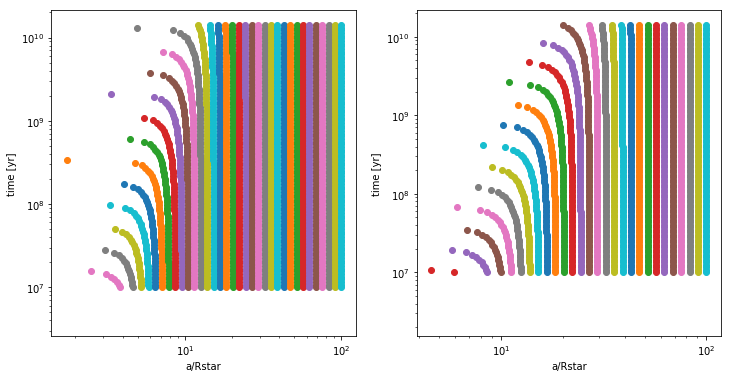

In [11]:
M_planet = 1*u.Mjupiter
M_star = 1*u.Msun
Q_star = 1e6
R_star = 1*u.Rsun

a_initials = np.logspace(0,2,50)*R_star

times = np.logspace(7,10.15,100)*u.yr

a = vector_a_of_t(a_initials, M_planet, M_star, R_star, Q_star, times)
a_by_Rstar = (a/R_star).cgs.value

plt.close('all')
f,axs = plt.subplots(ncols=2, nrows=1, figsize=(12,6))

# iterate over the 50 different tracks
for ix in range(a_by_Rstar.shape[0]):
    this_a_by_Rstar = a_by_Rstar[ix,:]
    axs[0].scatter(this_a_by_Rstar, times)

a = vector_a_of_t(a_initials, M_planet*100, M_star, R_star, Q_star, times)
a_by_Rstar = (a/R_star).cgs.value
for ix in range(a_by_Rstar.shape[0]):
    this_a_by_Rstar = a_by_Rstar[ix,:]
    axs[1].scatter(this_a_by_Rstar, times)
    
for ax in axs:
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('a/Rstar')
    ax.set_ylabel('time [yr]');

/Users/luke/local/miniconda3/envs/sci/lib/python3.6/site-packages/astropy/units/quantity.py:639: RuntimeWarning: invalid value encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


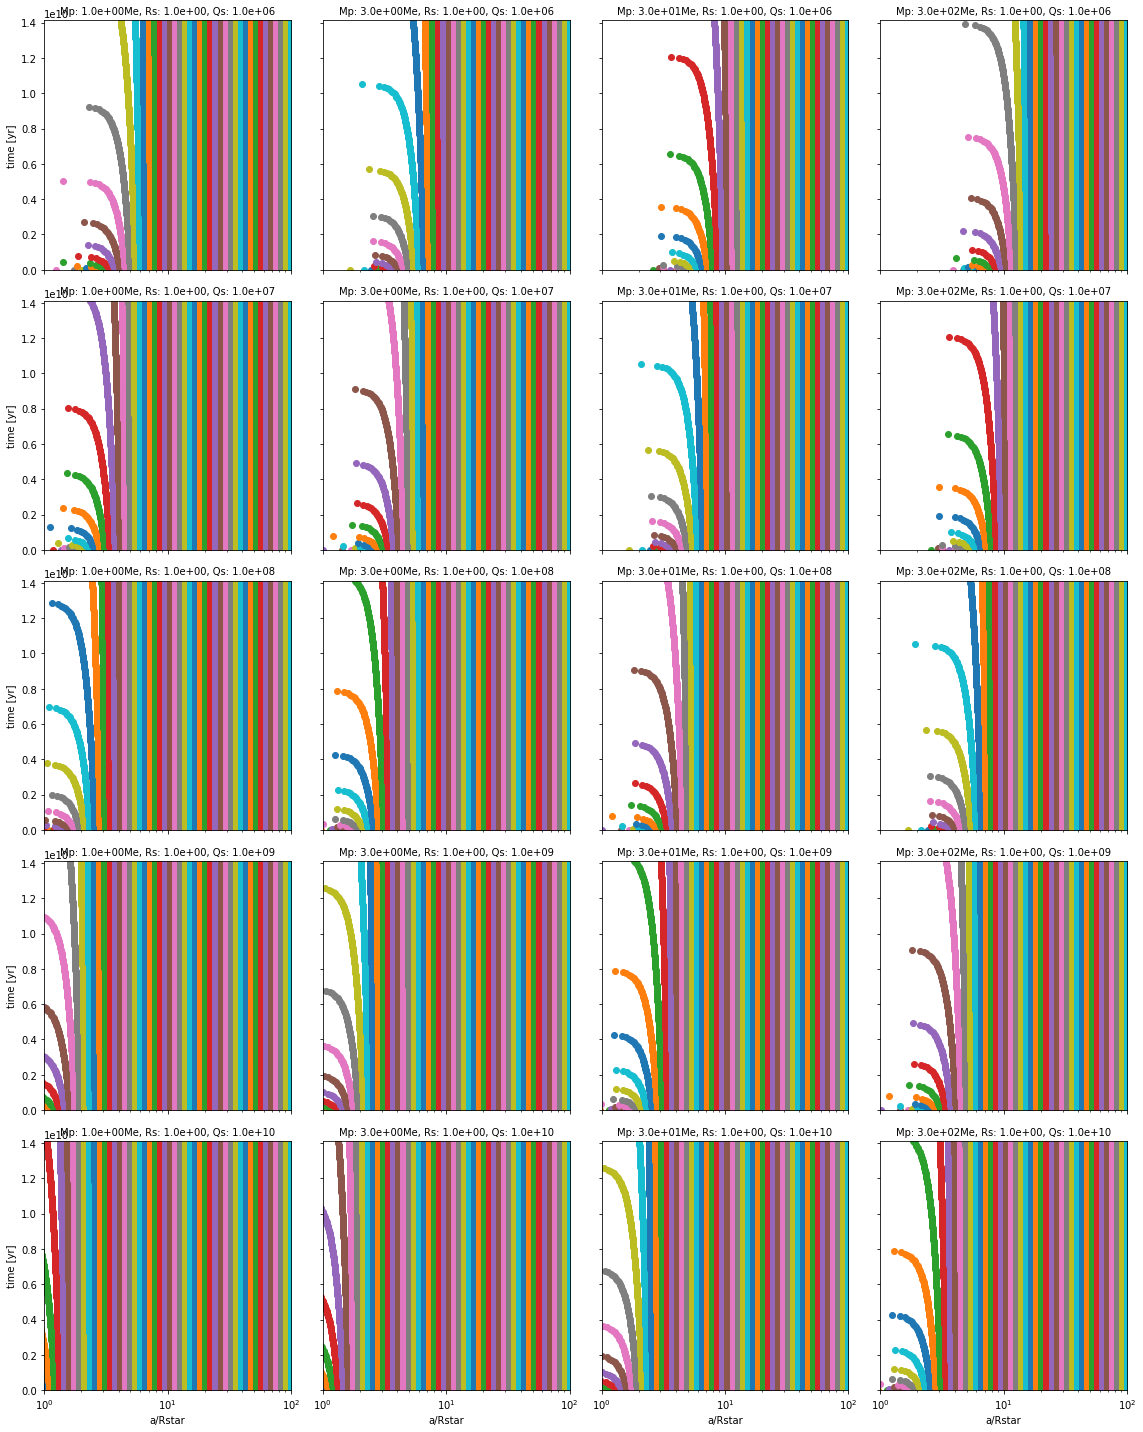

In [13]:
M_star = 1*u.Msun
R_star = 1*u.Rsun

a_initials = np.logspace(0,2,50)*R_star

for logy in [True, False]:
    
    if logy:
        times = np.logspace(7,10.15,100)*u.yr
    else:
        times = np.linspace(1e7,10**(10.15),200)*u.yr

    plt.close('all')

    ncols, nrows = 4, 5
    f,axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*4,nrows*4),
                         sharex=True, sharey=True)

    for col_ix, M_planet in enumerate( np.array([1,3,30,300])*u.Mearth ):
        for row_ix, Q_star in enumerate( np.logspace(6,10,5) ):

            a = vector_a_of_t(a_initials, M_planet, M_star, R_star, Q_star, times)
            a_by_Rstar = (a/R_star).cgs.value

            ax = axs[row_ix, col_ix]

            # iterate over the different tracks
            for ix in range(a_by_Rstar.shape[0]):

                this_a_by_Rstar = a_by_Rstar[ix,:]

                ax.scatter(this_a_by_Rstar, times, rasterized=True)

            ax.set_xscale('log')
            if logy:
                ax.set_yscale('log')
            ax.set_ylim([1e7,10**(10.15)])
            ax.set_xlim([1,1e2])
            ax.set_title('Mp: {:.1e}Me, Rs: {:.1e}, Qs: {:.1e}'.format
                        (M_planet.to(u.Mearth).value, R_star.value, Q_star),
                        fontsize=10);
            if col_ix % ncols == 0:
                ax.set_ylabel('time [yr]')
            if row_ix % nrows == nrows-1:
                ax.set_xlabel('a/Rstar')

    savdir = '../results/nb_semimajor_axis_evoln/'
    f.tight_layout()
    logystr = 'log' if logy else ''
    f.savefig(savdir+'{:s}age_vs_abyRstar.png'.format(logystr),
              dpi=300)        